In [13]:
%matplotlib inline

In [2]:
%matplotlib inline
import tick
from tick.plot import plot_point_process
from tick.hawkes import SimuHawkes, HawkesKernelSumExp
import matplotlib.pyplot as plt
import numpy as np
from tick.hawkes import SimuPoissonProcess
from tick.hawkes import SimuHawkesExpKernels

In [3]:
# Set global font properties
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Palatino', 'Georgia']
plt.rcParams['font.size'] = 14

In [85]:
run_time = 10
intensity = 0.6
dt = 0.01

poi = SimuPoissonProcess(intensity, end_time=run_time, verbose=False)
poi.track_intensity(dt)
poi.simulate()

In [86]:
timestamps = poi.timestamps[0]
intensity = poi.tracked_intensity
intensity_times = poi.intensity_tracked_times 
timestamps = np.append(timestamps, run_time)
timestamps = np.append(0, timestamps)

In [87]:
timestamps

array([ 0.        ,  0.75406674,  1.19203947,  3.6135705 ,  4.8535962 ,
        8.28366453, 10.        ])

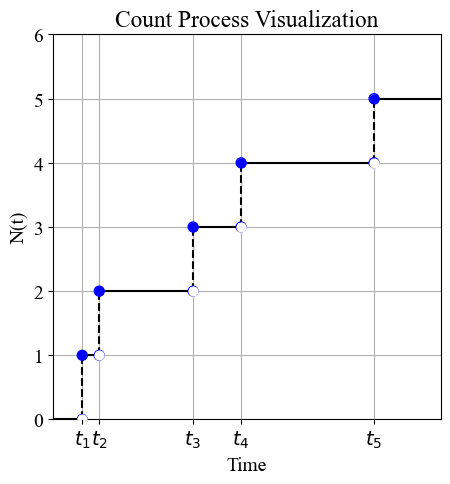

In [116]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
# Example data
#timestamps = np.array([2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])  # Replace with your timestamps
event_counts = np.arange(0, len(timestamps))



# Plot segments
for i in range(len(timestamps) - 1):
    plt.plot([timestamps[i], timestamps[i + 1]], [event_counts[i], event_counts[i]], 'k-')
for i in range(len(timestamps) - 2):
    plt.vlines(timestamps[i + 1], event_counts[i], event_counts[i + 1] if i + 1 < len(event_counts) else event_counts[i], colors='k', linestyles='dashed')

# Plot hollow points on the left
#plt.scatter(timestamps[1:-1], event_counts[1:-1], c='b', marker='o')
plt.scatter(timestamps[1:-1], event_counts[1:-1], facecolors='none', edgecolors='b', s=50, linewidths=1, zorder=5)
plt.scatter(timestamps[1:-1], event_counts[1:-1], c='blue', s=40, zorder=6)


# Plot filled points on the right
# Blue-edged circles with no fill
plt.scatter(timestamps[1:-1], event_counts[1:-1] - 1, facecolors='none', edgecolors='b', s=50, linewidths=1, zorder=5)
# Smaller white-filled circles overlaid on top of blue-edged circles
plt.scatter(timestamps[1:-1], event_counts[1:-1] - 1, c='white', s=40, zorder=6)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.title('Count Process Visualization')

# Set x-axis ticks and labels
plt.xticks(timestamps[1:-1], [f'$t_{i}$' for i in range(1, len(timestamps) - 1)])

# Set limits
plt.xlim([0, 10])
plt.ylim([0, 6])

plt.grid(True, zorder=0)
#plt.grid()
#plt.axisbelow(True)

plt.savefig("./pics/theory_count.png", dpi=300, bbox_inches='tight')
plt.show()


In [4]:
alpha = 0.2
beta = 3
lam = 1
seed = 1000
end_time = 100

In [5]:
def simulate_hw(alpha, beta, lam, end_time = 100, seed = 1000):
    adjacency = np.array([[alpha]]) #alpha
    decay =  beta
    baselines = np.array([lam]) #lambda

    hw = SimuHawkesExpKernels(adjacency, decay, baseline=baselines, seed=seed,verbose=False)
    hw.end_time = end_time
    dt = 0.01
    hw.track_intensity(dt)
    hw.simulate()
    timestamps = hw.timestamps[0]
    intensity = hw.tracked_intensity[0]
    intensity_times = hw.intensity_tracked_times
    event_counts = np.arange(1, len(timestamps) + 1)
    return timestamps, event_counts, intensity_times, intensity

In [185]:
ts, nt, inty_t, inty = simulate_hw(alpha, beta, lam, end_time = 100, seed = 1200)

In [6]:
sd = np.random.choice(20000, 400)

In [7]:
ll_ts = []
ll_nt = []
ll_inty_t = []
ll_inty = []
for s in sd:
    ts, nt, inty_t, inty = simulate_hw(alpha, beta, lam, end_time = 100, seed = int(s))
    ll_ts.append(ts)
    ll_nt.append(nt)
    ll_inty_t.append(inty_t)
    ll_inty.append(inty)

In [8]:
# Initialize a list to hold the interpolated values for each array in ll_ts
interpolated_values = []
# Loop over each array in ll_ts and perform interpolation
for i, array in enumerate(ll_ts):
    interpolated_values.append(np.interp(ts, array, ll_nt[i]))
interpolated_array = np.array(interpolated_values)
nt_avg = np.mean(interpolated_array, axis=0)

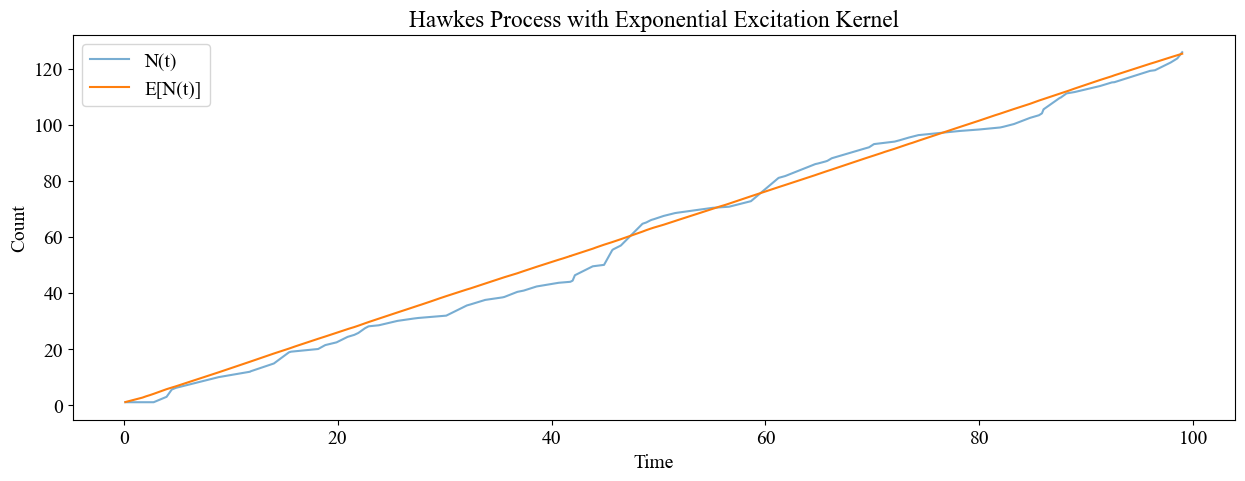

In [33]:
plt.figure(figsize=(15, 5))
for i in range(100,101):
    plt.plot(ts, interpolated_array[i], alpha = 0.6, label = "N(t)")
plt.plot(ts, nt_avg, label="E[N(t)]")
# Set labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title("Hawkes Process with Exponential Excitation Kernel")
plt.legend()
plt.savefig("./pics/theory_hw_count.png", dpi=300, bbox_inches='tight')
#plt.title('Count Process Visualization')

In [18]:
# Initialize a list to hold the interpolated values for each array in ll_ts
int_val = []
# Loop over each array in ll_ts and perform interpolation
for i, array in enumerate(ll_inty_t):
    int_val.append(np.interp(inty_t, array, ll_inty[i]))
int_val = np.array(int_val)
int_avg = np.mean(int_val, axis=0)

In [11]:
plt.plot(inty_t, inty)
plt.plot(inty_t, int_avg)

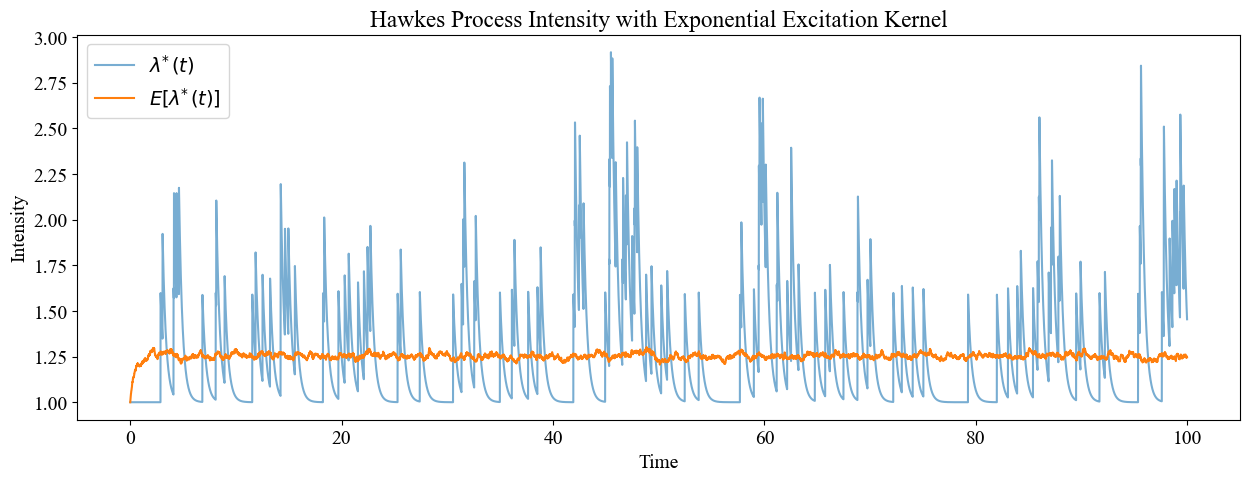

In [34]:
plt.figure(figsize=(15, 5))
for i in range(100,101):
    plt.plot(inty_t, int_val[i], alpha = 0.6, label = "$\lambda\!^*(t)$")
plt.plot(inty_t, int_avg, label="$E[\lambda\!^*(t)]$")
# Set labels and title
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title("Hawkes Process Intensity with Exponential Excitation Kernel")
plt.legend()
plt.savefig("./pics/theory_hw_intensity.png", dpi=300, bbox_inches='tight')
#plt.title('Count Process Visualization')